In [1]:
%pip install pandas nltk textblob vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/nivethikaa/Documents/GitHub/is434_heritageone/google_reviews.csv')

# Handle missing values in the 'description' column
data['description'] = data['description'].fillna('')
print("Initial Data Sample:")
print(data[['description']].head(), "\n")  # Print initial sample


Initial Data Sample:
                                         description
0  I have invited a 3 friends for the dinner.\nTh...
1  Pleased to see a Mangalorean restaurant finall...
2  Good service.   Fish a bit too spicy and lassi...
3  Nothing quite satisfies your taste buds like a...
4  My uncle called me up, excited to tell me abou... 



In [3]:
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(processed_tokens)

# Apply preprocessing
data['cleaned_description'] = data['description'].apply(preprocess_text)
print("Data after Cleaning and Tokenization:")
print(data[['description', 'cleaned_description']].head(), "\n")  # Print cleaned sample


Data after Cleaning and Tokenization:
                                         description  \
0  I have invited a 3 friends for the dinner.\nTh...   
1  Pleased to see a Mangalorean restaurant finall...   
2  Good service.   Fish a bit too spicy and lassi...   
3  Nothing quite satisfies your taste buds like a...   
4  My uncle called me up, excited to tell me abou...   

                                 cleaned_description  
0  invited friend dinner service fantastic food t...  
1  pleased see mangalorean restaurant finally ope...  
2  good service fish bit spicy lassi sweet probab...  
3  nothing quite satisfies taste bud like authent...  
4  uncle called excited tell mangalorean place si...   



#### convert the relative dates (like "a month ago") to actual dates.

In [7]:
from datetime import datetime, timedelta

# Function to convert relative dates to actual dates
def convert_relative_date(relative_date):
    if 'a month ago' in relative_date:
        return datetime.now() - timedelta(days=30)
    elif 'months ago' in relative_date:
        months_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=months_ago * 30)
    elif 'a week ago' in relative_date:
        return datetime.now() - timedelta(weeks=1)
    elif 'weeks ago' in relative_date:
        weeks_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(weeks=weeks_ago)
    elif 'a day ago' in relative_date:
        return datetime.now() - timedelta(days=1)
    elif 'days ago' in relative_date:
        days_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=days_ago)
    else:
        return None  # Handle other cases as necessary


In [8]:
# Convert date column
data['date'] = data['date'].apply(convert_relative_date)
print("Converted Dates Sample:")
print(data[['date']].head(), "\n")  # Print converted dates sample


Converted Dates Sample:
                        date
0 2024-09-18 19:18:36.167741
1 2024-05-21 19:18:36.167759
2 2024-09-18 19:18:36.167761
3 2024-04-21 19:18:36.167765
4 2024-03-22 19:18:36.167767 



In [9]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)  # Analyze sentiment
    # Classify sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


In [10]:
# Apply sentiment analysis
data['sentiment'] = data['cleaned_description'].apply(get_sentiment)
print("Data with Sentiment Analysis Results:")
print(data[['cleaned_description', 'sentiment']].head(), "\n")  # Print sample with sentiment


Data with Sentiment Analysis Results:
                                 cleaned_description sentiment
0  invited friend dinner service fantastic food t...  positive
1  pleased see mangalorean restaurant finally ope...  positive
2  good service fish bit spicy lassi sweet probab...  positive
3  nothing quite satisfies taste bud like authent...  positive
4  uncle called excited tell mangalorean place si...  positive 



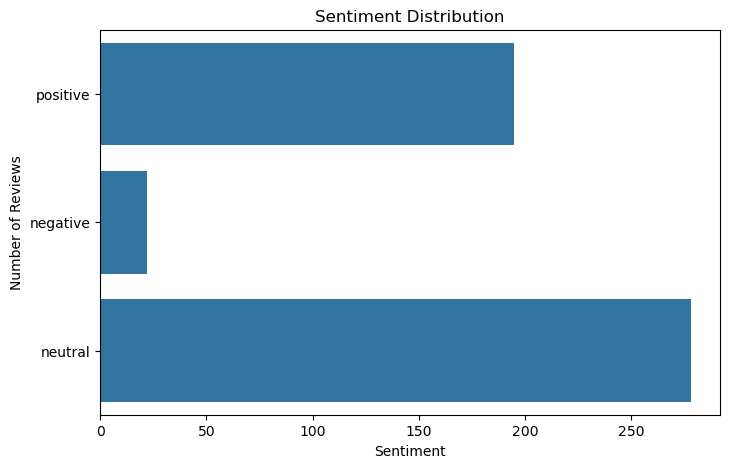

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [17]:
# Aggregate sentiment over time
sentiment_over_time = data.groupby(data['date'].dt.to_period('M')).size()

# Check if sentiment_over_time is empty before plotting
if sentiment_over_time.empty:
    print("No sentiment data available for the specified date range.")
else:
    # Print sentiment trends
    print("Sentiment Trend Over Time:")
    print(sentiment_over_time, "\n")


Sentiment Trend Over Time:
date
2023-11     4
2023-12     3
2024-02    10
2024-03    19
2024-04    19
2024-05     9
2024-06     8
2024-07     4
2024-08     4
2024-09     5
Freq: M, dtype: int64 



In [14]:
%pip install wordcloud matplotlib pandas nltk


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 169.4/169.4 kB 3.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/var/folders/ql/jrpypjjx1zld2ngtdy0tz54r0000gn/T/ipykernel_7923/1791386051.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['description'] = sentiment_data['description'].fillna('')


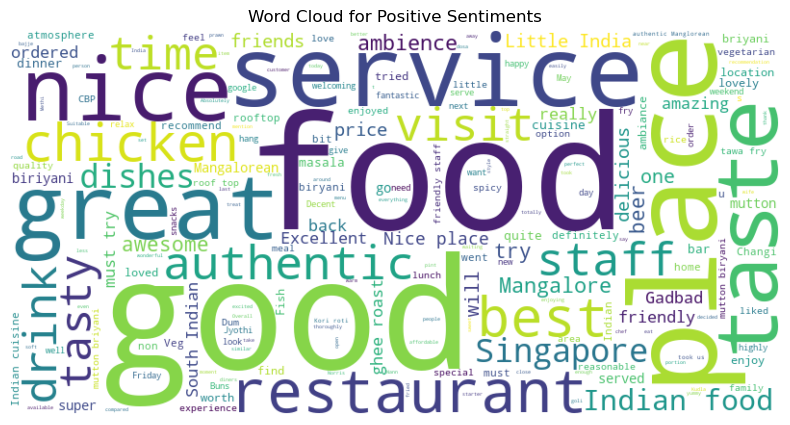

One-line excerpts from reviews containing top words for Positive sentiment:
- I have invited a 3 friends for the dinner
- Nothing quite satisfies your taste buds like an authentic Manglorean meal!

This was my first time in more than a year trying Manglorean food and Kudla Village did not disappoint
- My uncle called me up, excited to tell me about this mangalorean place in Singapore
- Good food and amazing atmosphere
- Chittinadu food super and   must try Dindigul biryani   and  Beach prawn  üç∫ good combination  and service staff very  friendly
- Was here with friends for a Sunday lunch and was unsure as it was a new establishment
- Found this place luckily on google
- Loved this place
- Kudla village was a complete surprise for me
- Me and my wife had a lovely experience here
- Updated: pop by this place for stella pints/cuisine as I was in the vincinty
- One of the best Mangalore food in Singapore
- Delicious food, lovely staff, great prices and nice cool beer!
- One of the best f

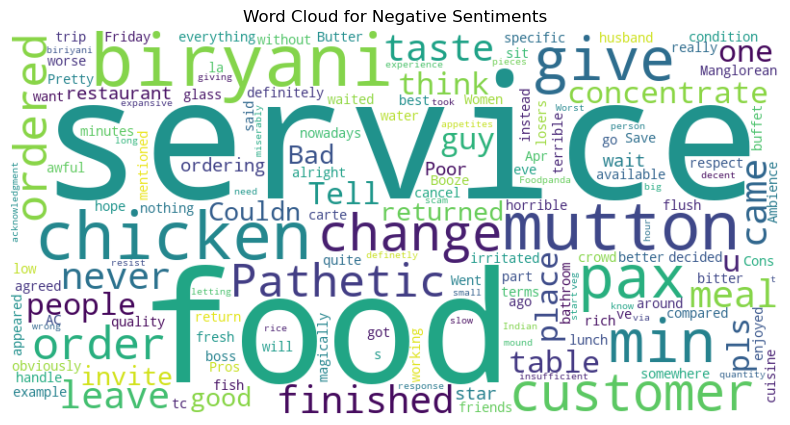

One-line excerpts from reviews containing top words for Negative sentiment:
- The best part was the AC
- Pretty pathetic place in terms of customer service! Went there on 27 Apr with friends
- The best part was the AC
- They are too specific nowadays
- Pretty pathetic place in terms of customer service! Went there on 27 Apr with friends
- Pros : Food was good
Order A la carte
Booze all enjoyed

Cons : Service was not good , Couldn handle the crowd on Friday eve
People who ordered buffet are the losers

If you think you can invite 30 pax by ordering for 28 pax it‚Äôs definetly the wrong place

You have to order for 30 pax and invite 15 pax

And since ours was a bad experience am letting you all know

(The quantity was insufficient for big appetites )

That 1 start is because the food was decent couldn‚Äôt resist giving a star
- Poor service with no acknowledgment
- Worst service
- Very slow service need to wait for more than 20 mins for food to get into table
- Pathetic service
- They a

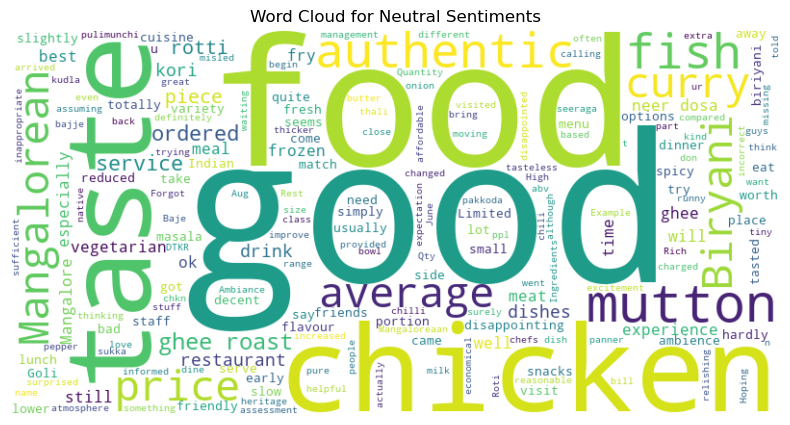

One-line excerpts from reviews containing top words for Neutral sentiment:
- Authentic Mangalore Food is still not here! I went thinking of relishing the dishes that I love,  although food is decent it is no where even slightly close to a good mangalorean food
- I often came to heritage for drinks,side dishes and dinner with my friends
- I was quite disappointed
- To begin with there is no taste of  ‚Äúauthentic Mangalorean food‚Äù but just the menu
- Forgot how the ghee roast tastes after trying the chicken ghee roast here
- For dine in, especially for dinner, it's a good place with variety of food and drinks and economical as well
- Usually their food is tasty, and good service but today I got bad experience, when ordered chicken biriyani they brought mutton biriyani, after claiming this is not the initial order simply they replaced mutton pieces with 'curry chicken'
- You can eat peacefully and relaxly
- While the food is reasonably priced and taste above satisfactory, the service i

In [32]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the CSV file
data = pd.read_csv('google_reviews.csv')

# Preprocess ratings to categorize sentiment
def categorize_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating >= 2.0:
        return 'neutral'
    else:
        return 'negative'

# Apply the categorize function to the 'rating' column
data['sentiment'] = data['rating'].apply(categorize_sentiment)

# Define a function to create and display word cloud and fetch reviews
def generate_wordcloud_with_reviews(data, sentiment):
    # Filter data for the specific sentiment
    sentiment_data = data[data['sentiment'] == sentiment]
    
    # Replace NaN values in 'description' column with empty strings
    sentiment_data['description'] = sentiment_data['description'].fillna('')
    
    # Combine all reviews into one text string
    text = ' '.join(sentiment_data['description'].tolist())
    
    # Define a set of stopwords (common words to exclude)
    stopwords = set(STOPWORDS)
    
    # Create a word cloud while excluding stop words
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiments')
    plt.show()
    
    # Get the top words from the word cloud, excluding stop words
    word_list = [word for word in text.split() if word.lower() not in stopwords]
    word_freq = Counter(word_list)
    top_words = [word for word, freq in word_freq.most_common(10)]  # Get the top 10 meaningful words
    
    # Print one-line excerpts from the reviews containing the top words
    print(f"One-line excerpts from reviews containing top words for {sentiment.capitalize()} sentiment:")
    for word in top_words:
        
        # Use regular expression for exact word match
        reviews = sentiment_data[sentiment_data['description'].apply(lambda x: bool(re.search(rf'\b{word}\b', x, re.IGNORECASE)))]['description'].tolist()
        for review in reviews:
            # Print only the first line of each review
            first_line = review.split('.')[0]  # Get the text before the first period (.)
            print(f"- {first_line}")

# Generate word clouds and display one-line review excerpts for each sentiment
generate_wordcloud_with_reviews(data, 'positive')
generate_wordcloud_with_reviews(data, 'negative')
generate_wordcloud_with_reviews(data, 'neutral')
